In [19]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict

In this section we show the graph coloured by property for each of the different properties found in our source. Some are rather sparse, as only a handful of character have any value for the property. There is a huge number of nodes that have no links to any other node. This is to be expected due to the nature of characters in the expanded universe of Star Wars. Many characters are introduced in obscure media such as books that few people read, and thus our source does not have much to say about them, leading to no connections. There are two properties in particular we wish to highlight. Firstly, the appearances graph shows that the material in which a character appears is a good predictor of being connected to one another. Secondly, the affiliations graph shows how what side you support does not indicate whether you are linked, despite this being an intuitive way of making connection. These two observations are supported by the modularity for each of the properties. The rest of the properties have very low modularity, and we thus conclude that the only good clustering to be found amongst properties is that of appearances.
The final graph shown is the clustering created by the Louvain algorithm. This is closest to matching the appearances clustering.
The bi-directionality of the graph does lead to some loss of information as the nature of the edges is a mention in one article of the other. However, we decided that such a connection should be a between both character as there were so few connections in the entire graph. We did consider using other sources to add nodes to the graph, but could not find sufficient material or methods to achieve this.
Our main insight from the graph, is the strong connection that appearing in the same material provides, and that most other properties do not result in a link between two characters in our data source.

In [20]:
def return_set():
    return set()
df_texts = pd.read_csv('descriptions.csv', sep=';', converters={'properties': literal_eval})
properties_dict = defaultdict(return_set)
for dic in df_texts['properties']:
    for el in dic.keys():
        for el1 in dic[el]:
            properties_dict[el].add(el1)

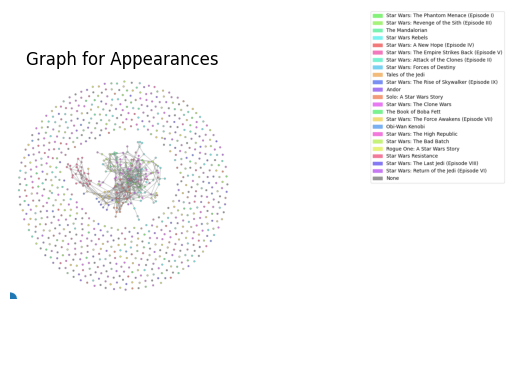

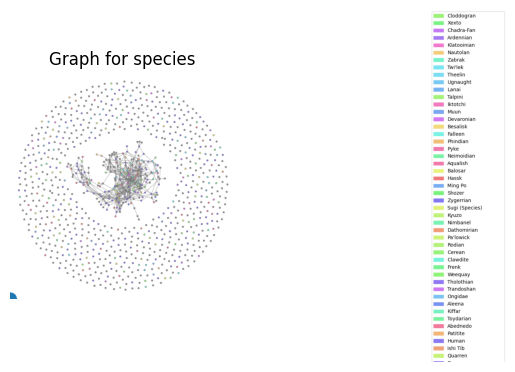

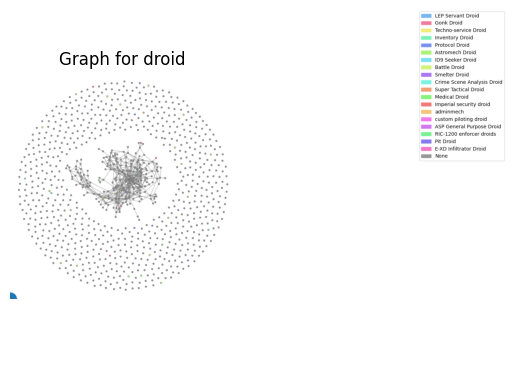

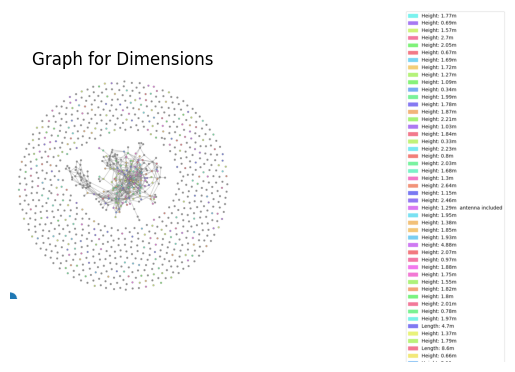

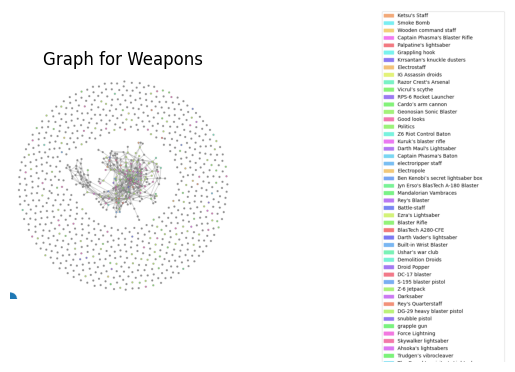

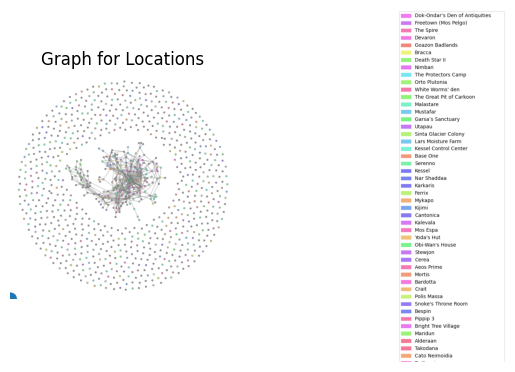

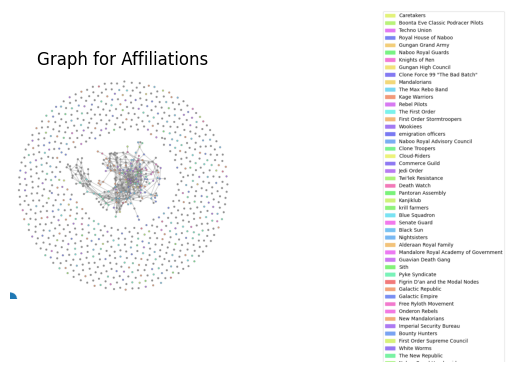

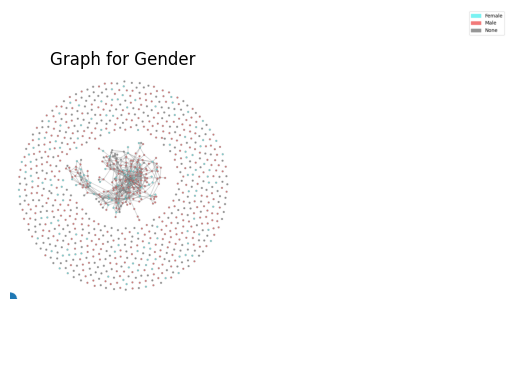

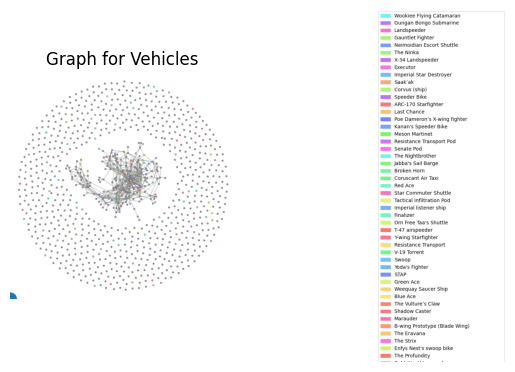

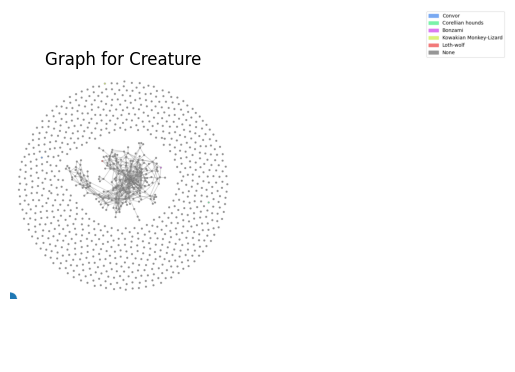

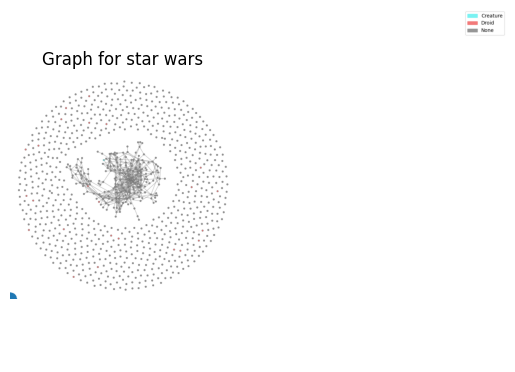

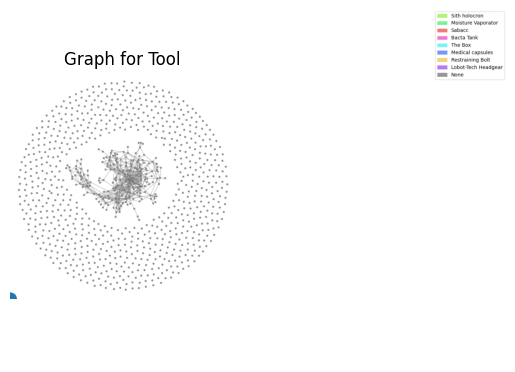

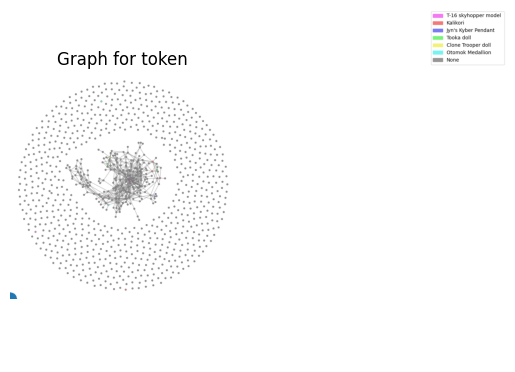

In [21]:
for attribute in properties_dict.keys():
    if attribute != 'generic':
        fig, axs = plt.subplots(1, 2)
        ax1, ax2 = axs
        ax1.axis('off')
        ax2.axis('off')
        ax1.set_title(f'Graph for {attribute}')
        img_graph = mpimg.imread(f'new_images_graphs/Graph_{attribute}.png')
        ax1.imshow(img_graph)
        img_legend = mpimg.imread(f'new_images_graphs/legend_{attribute}.png')
        ax2.imshow(img_legend)
        plt.show()

Many of the graphs have many categories and thus are uninformative when it comes to drawing any conclusions about the connections in Star Wars. 

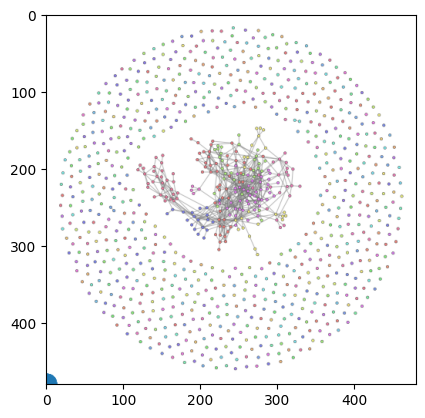

In [22]:
img_louvain = mpimg.imread(f'new_images_graphs/Graph_louvain.png')
plt.imshow(img_louvain)
plt.show()

The louvain algorithm seems to identify the group found using appearances.